#***Girvan-Newman***

In [ ]:
import networkx as nx
import pandas as pd
from networkx.algorithms.community import girvan_newman
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta
import itertools

In [ ]:
# Load the data from CSV (make sure the CSV has the appropriate columns)
file_path = 'call_records.csv'  # Path to your CSV file
df = pd.read_csv(file_path)
print(df.head())

   Calling Party  Called Party             IMEI             IMSI   Call Date  \
0     7806566906    7138293654   62562145495284  718316146034816  2024-08-13   
1     8581916045    8366256065   56867908299113  137911514839499  2024-05-07   
2     8546153259    7028705640  230776734184963  700140413585133  2024-10-25   
3     7982574554    8754470786  135125722662329  161145201063753  2024-11-26   
4     7028705640    8566239944  253463756543498    5803058135918  2024-10-11   

  Call Type Start Time  End Time  Duration (seconds)  
0    SMS In   06:25:50       NaN                   0  
1    SMS In   23:11:17       NaN                   0  
2  Voice In   00:57:08  02:16:59                4791  
3    SMS In   23:11:24       NaN                   0  
4  Voice In   18:44:51  19:21:41                2210  


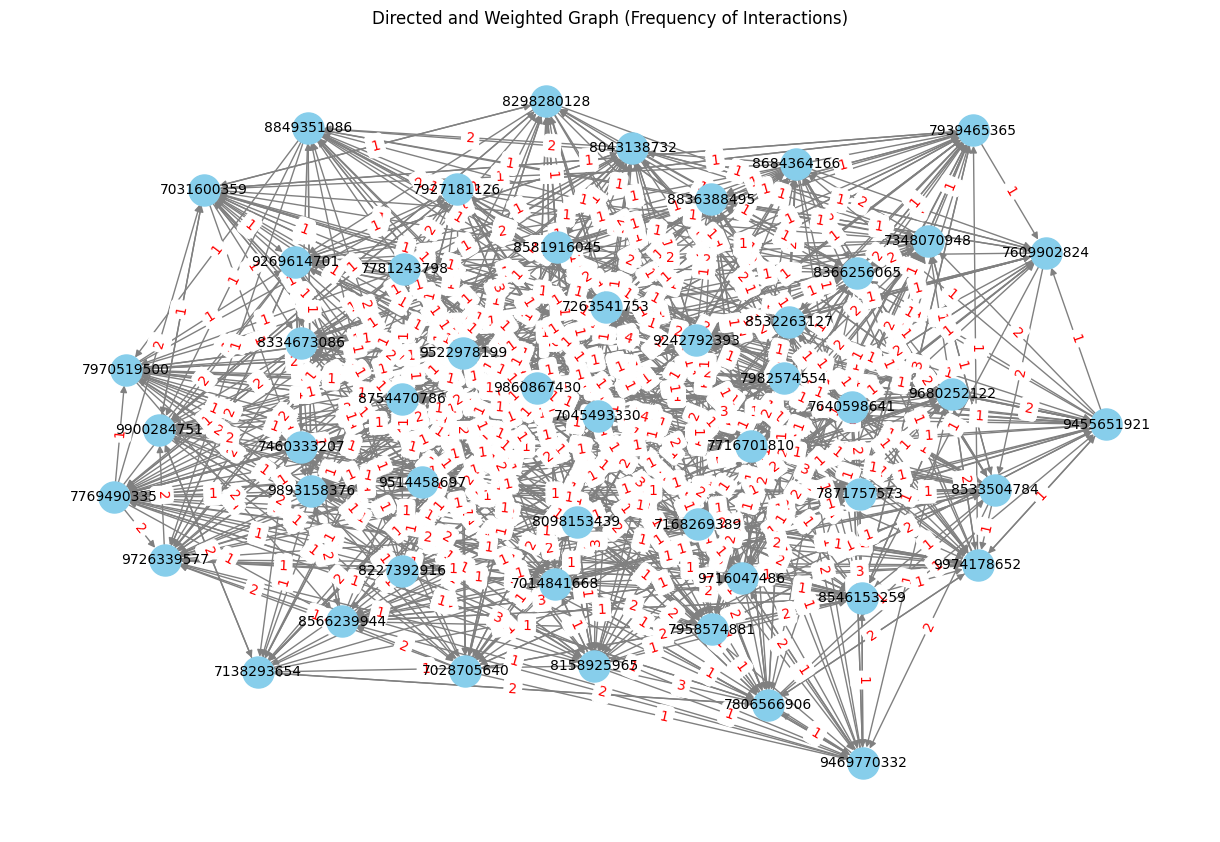

In [ ]:
# Creating a Directed Graph (weighted by frequency of calls or SMS)
G = nx.DiGraph()

# Compute frequency of interactions (calls + SMS) between each pair
interaction_counts = df.groupby(['Calling Party', 'Called Party']).size().reset_index(name='Frequency')

# Adding directed edges with frequency as weights
for _, row in interaction_counts.iterrows():
    G.add_edge(row['Calling Party'], row['Called Party'], weight=row['Frequency'])

# Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

# Visualizing the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Position nodes using a force-directed algorithm
weights = nx.get_edge_attributes(G, 'weight')

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_color="red")
plt.title("Directed and Weighted Graph (Frequency of Interactions)")
plt.show()


In [ ]:
# Calculate the Girvan-Newman algorithm
comp = girvan_newman(G)

In [ ]:
# Find the communities with the highest modularity
k = 5  # You can adjust this parameter for different granularity of communities.
limited = itertools.takewhile(lambda c: len(c) <= k, comp)

# Get the first community structure with the desired number of communities
communities = next(limited)

In [ ]:
# Print the communities
print("Communities detected by Girvan-Newman:")
for idx, community in enumerate(communities):
    print(f"Community {idx + 1}: {set(community)}")

Communities detected by Girvan-Newman:
Community 1: {8754470786, 7871757573, 8684364166, 8158925965, 8581916045, 8836388495, 8533504784, 8227392916, 7939465365, 7781243798, 7460333207, 9522978199, 7769490335, 7958574881, 7348070948, 8546153259, 8043138732, 9726339577, 8849351086, 8334673086, 8298280128, 8366256065, 7014841668, 7927181126, 8566239944, 9242792393, 9514458697, 7970519500, 7168269389, 9900284751, 9455651921, 7045493330, 8532263127, 9680252122, 7982574554, 9469770332, 9974178652, 8098153439, 9860867430, 7031600359, 7028705640, 9893158376, 7609902824, 9269614701, 7640598641, 7716701810, 7263541753, 7806566906, 9716047486}
Community 2: {7138293654}


In [ ]:
# Calculating Modularity Score
modularity_score = nx.algorithms.community.modularity(G, communities)
print(f"Modularity Score: {modularity_score}")

Modularity Score: -0.0003079999999999875


In [ ]:
# Color nodes based on community assignment
color_map = {}
for idx, community in enumerate(communities):
    for node in community:
        color_map[node] = idx

# Creating a list of colors for the nodes
node_colors = [color_map.get(node, 0) for node in G.nodes()]

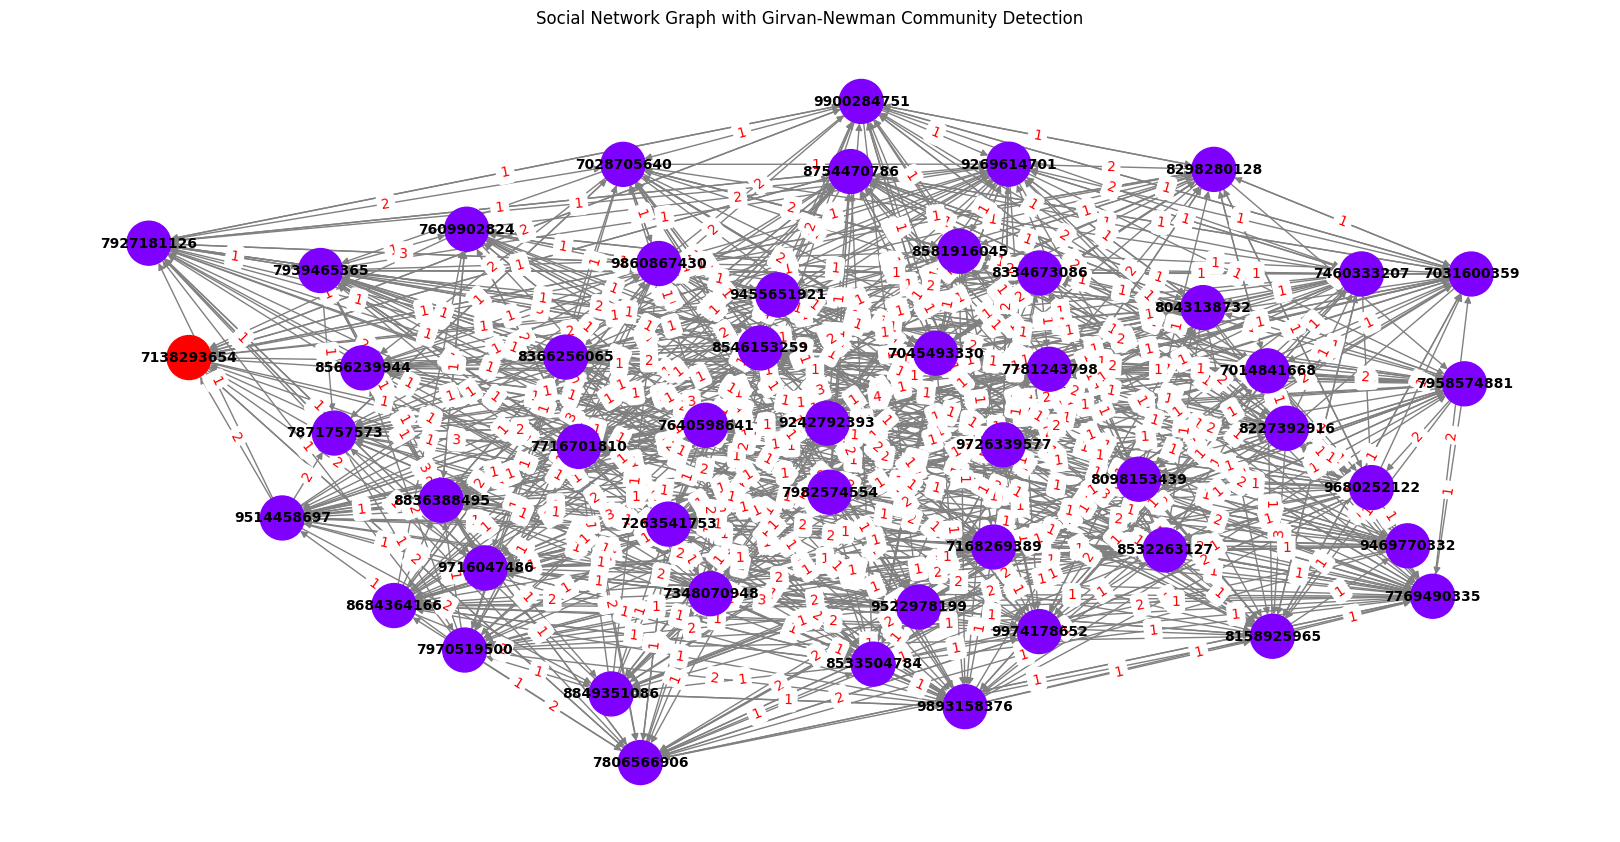

In [ ]:
# Drawing the graph with different colors for each community
plt.figure(figsize=(16, 8))
pos = nx.spring_layout(G, seed=25)
nx.draw(G, pos, with_labels=True, node_size=1000,
        node_color=node_colors, cmap=plt.cm.rainbow,
        font_size=10, font_weight='bold', edge_color='gray')

# Add edge weights as labels
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')

# Display the plot
plt.title("Social Network Graph with Girvan-Newman Community Detection")
plt.show()